********************************************************************
 Did you run "pip install" in your clawpack directory?
********************************************************************


Traceback (most recent call last):
  File "/Users/hansonmo/opt/anaconda3/lib/python3.9/site-packages/clawpack/riemann/__init__.py", line 56, in <module>
    from . import acoustics_1D
ImportError: dlopen(/Users/hansonmo/opt/anaconda3/lib/python3.9/site-packages/clawpack/riemann/acoustics_1D.cpython-39-darwin.so, 2): Symbol not found: _rp1_
  Referenced from: /Users/hansonmo/opt/anaconda3/lib/python3.9/site-packages/clawpack/riemann/acoustics_1D.cpython-39-darwin.so
  Expected in: flat namespace
 in /Users/hansonmo/opt/anaconda3/lib/python3.9/site-packages/clawpack/riemann/acoustics_1D.cpython-39-darwin.so


2024-05-10 16:31:46,072 INFO CLAW: Solution 0 computed for time t=0.000000
2024-05-10 16:31:46,077 INFO CLAW: Solution 1 computed for time t=0.100000
2024-05-10 16:31:46,082 INFO CLAW: Solution 2 computed for time t=0.200000
2024-05-10 16:31:46,086 INFO CLAW: Solution 3 computed for time t=0.300000
2024-05-10 16:31:46,089 INFO CLAW: Solution 4 computed for time t=0.400000
2024-05-10 16:31:46,093 INFO CLAW: Solution 5 computed for time t=0.500000
2024-05-10 16:31:46,096 INFO CLAW: Solution 6 computed for time t=0.600000
2024-05-10 16:31:46,100 INFO CLAW: Solution 7 computed for time t=0.700000
2024-05-10 16:31:46,103 INFO CLAW: Solution 8 computed for time t=0.800000
2024-05-10 16:31:46,107 INFO CLAW: Solution 9 computed for time t=0.900000
2024-05-10 16:31:46,110 INFO CLAW: Solution 10 computed for time t=1.000000
2024-05-10 16:31:46,111 INFO CLAW: Solution 0 computed for time t=0.000000
2024-05-10 16:31:46,116 INFO CLAW: Solution 1 computed for time t=0.100000
2024-05-10 16:31:46,119 

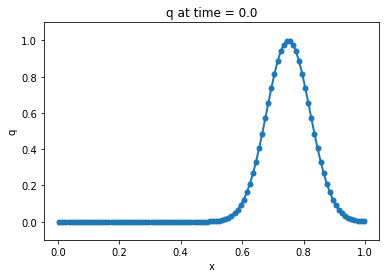

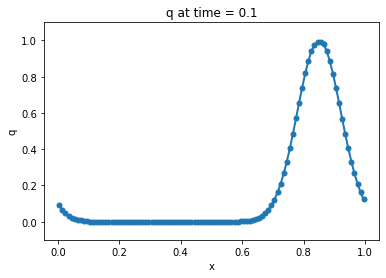

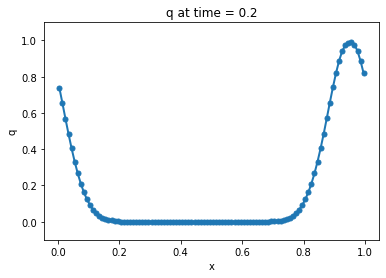

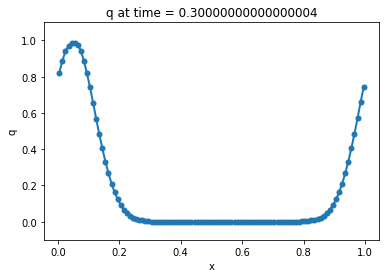

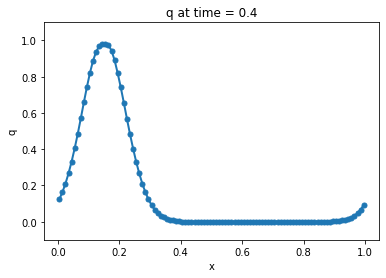

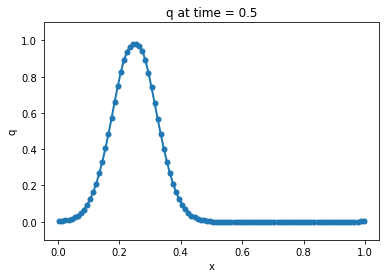

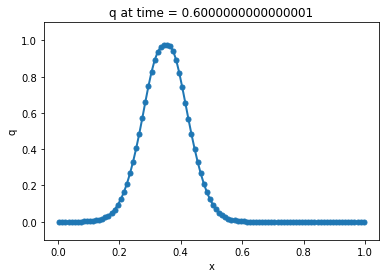

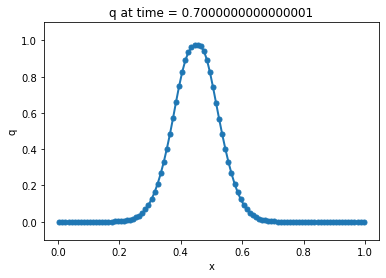

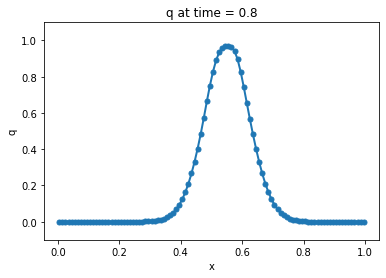

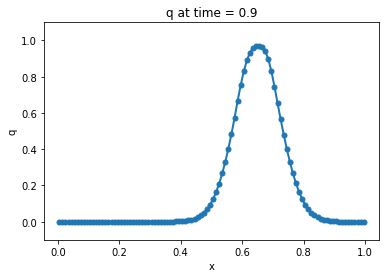

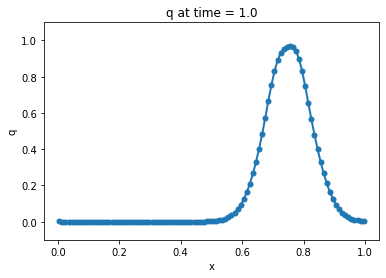

In [1]:
import numpy as np
from clawpack import riemann
import matplotlib.pyplot as plt

def setup(nx=100, kernel_language='Python', use_petsc=False, solver_type='classic', weno_order=5, 
          time_integrator='SSP104', outdir='./_output'):

    if use_petsc:
        import clawpack.petclaw as pyclaw
    else:
        from clawpack import pyclaw

    if kernel_language == 'Fortran':
        riemann_solver = riemann.advection_1D
    elif kernel_language == 'Python':
        riemann_solver = riemann.advection_1D_py.advection_1D
            
    if solver_type=='classic':
        solver = pyclaw.ClawSolver1D(riemann_solver)
    elif solver_type=='sharpclaw':
        solver = pyclaw.SharpClawSolver1D(riemann_solver)
        solver.weno_order = weno_order
        solver.time_integrator = time_integrator
        if time_integrator == 'SSPLMMk3':
            solver.lmm_steps = 5
            solver.check_lmm_cond = True
    else: raise Exception('Unrecognized value of solver_type.')

    solver.kernel_language = kernel_language

    solver.bc_lower[0] = pyclaw.BC.periodic
    solver.bc_upper[0] = pyclaw.BC.periodic

    x = pyclaw.Dimension(0.0,1.0,nx,name='x')
    domain = pyclaw.Domain(x)
    state = pyclaw.State(domain,solver.num_eqn)

    state.problem_data['u'] = 1.  # Advection velocity

    # Initial data
    xc = state.grid.x.centers
    beta = 100; gamma = 0; x0 = 0.75
    state.q[0,:] = np.exp(-beta * (xc-x0)**2) * np.cos(gamma * (xc - x0))

    claw = pyclaw.Controller()
    claw.keep_copy = True
    claw.solution = pyclaw.Solution(state,domain)
    claw.solver = solver

    if outdir is not None:
        claw.outdir = outdir
    else:
        claw.output_format = None

    claw.tfinal =1.0
    claw.setplot = setplot

    return claw

def setplot(plotdata):
    """ 
    Plot solution using VisClaw.
    """ 
    plotdata.clearfigures()  # clear any old figures,axes,items data

    plotfigure = plotdata.new_plotfigure(name='q', figno=1)

    # Set up for axes in this figure:
    plotaxes = plotfigure.new_plotaxes()
    plotaxes.ylimits = [-.2,1.0]
    plotaxes.title = 'q'

    # Set up for item on these axes:
    plotitem = plotaxes.new_plotitem(plot_type='1d_plot')
    plotitem.plot_var = 0
    plotitem.plotstyle = '-o'
    plotitem.color = 'b'
    plotitem.kwargs = {'linewidth':2,'markersize':5}
    
    return plotdata

 
if __name__=="__main__":
    from clawpack.pyclaw.util import run_app_from_main
    output = run_app_from_main(setup,setplot)
    claw = setup()
    claw.run()
    for frame in claw.frames:
        plt.figure()
        plt.plot(frame.state.grid.x.centers, frame.state.q[0, :], '-o', linewidth=2, markersize=5)
        plt.ylim(-0.1, 1.1)
        plt.title('q at time = {}'.format(frame.t))
        plt.xlabel('x')
        plt.ylabel('q')
        plt.show()

2024-05-10 16:31:57,735 INFO CLAW: Solution 0 computed for time t=0.000000
2024-05-10 16:31:57,754 INFO CLAW: Solution 1 computed for time t=0.100000
2024-05-10 16:31:57,767 INFO CLAW: Solution 2 computed for time t=0.200000
2024-05-10 16:31:57,779 INFO CLAW: Solution 3 computed for time t=0.300000
2024-05-10 16:31:57,789 INFO CLAW: Solution 4 computed for time t=0.400000
2024-05-10 16:31:57,798 INFO CLAW: Solution 5 computed for time t=0.500000
2024-05-10 16:31:57,807 INFO CLAW: Solution 6 computed for time t=0.600000
2024-05-10 16:31:57,816 INFO CLAW: Solution 7 computed for time t=0.700000
2024-05-10 16:31:57,824 INFO CLAW: Solution 8 computed for time t=0.800000
2024-05-10 16:31:57,832 INFO CLAW: Solution 9 computed for time t=0.900000
2024-05-10 16:31:57,841 INFO CLAW: Solution 10 computed for time t=1.000000
2024-05-10 16:31:57,843 INFO CLAW: Solution 0 computed for time t=0.000000
2024-05-10 16:31:57,852 INFO CLAW: Solution 1 computed for time t=0.100000
2024-05-10 16:31:57,861 

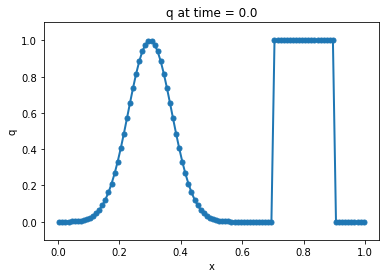

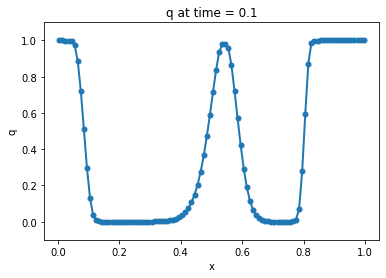

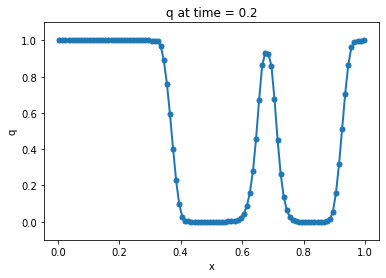

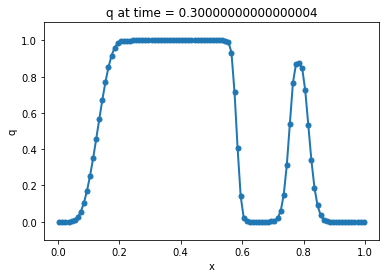

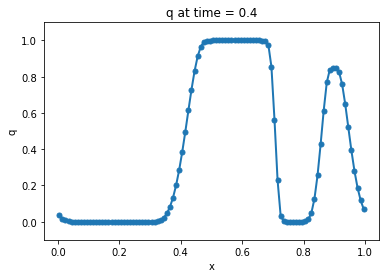

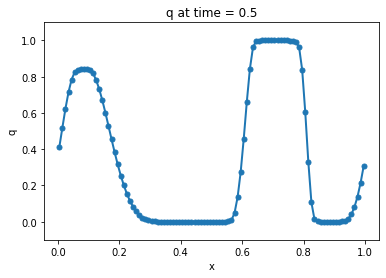

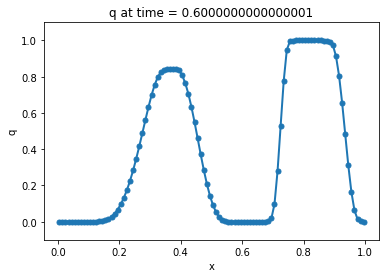

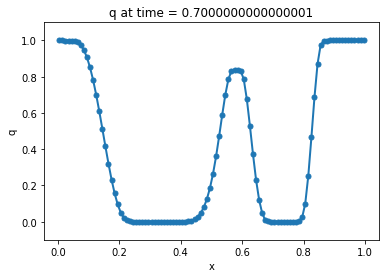

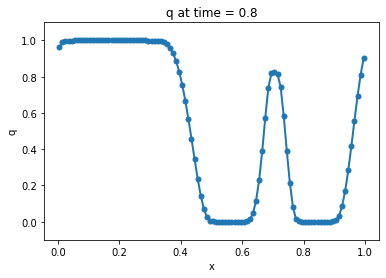

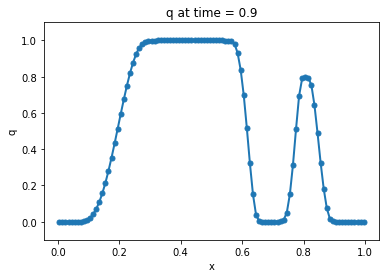

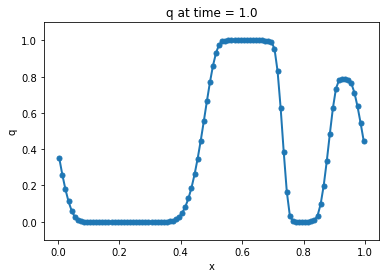

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def qinit(state):

    # Initial Data parameters
    ic = 3
    beta = 100.
    gamma = 0.
    x0 = 0.3
    x1 = 0.7
    x2 = 0.9

    x =state.grid.x.centers
    
    # Gaussian
    qg = np.exp(-beta * (x-x0)**2) * np.cos(gamma * (x - x0))
    # Step Function
    qs = (x > x1) * 1.0 - (x > x2) * 1.0
    
    if   ic == 1: state.q[0,:] = qg
    elif ic == 2: state.q[0,:] = qs
    elif ic == 3: state.q[0,:] = qg + qs


def auxinit(state):
    # Initialize petsc Structures for aux
    xc=state.grid.x.centers
    state.aux[0,:] = np.sin(2.*np.pi*xc)+2
    

def setup(use_petsc=False,solver_type='classic',kernel_language='Python',outdir='./_output'):
    from clawpack import riemann

    if use_petsc:
        import clawpack.petclaw as pyclaw
    else:
        from clawpack import pyclaw

    if solver_type=='classic':
        if kernel_language == 'Fortran':
            solver = pyclaw.ClawSolver1D(riemann.advection_color_1D)
        elif kernel_language=='Python': 
            solver = pyclaw.ClawSolver1D(riemann.vc_advection_1D_py.vc_advection_1D)
    elif solver_type=='sharpclaw':
        if kernel_language == 'Fortran':
            solver = pyclaw.SharpClawSolver1D(riemann.advection_color_1D)
        elif kernel_language=='Python': 
            solver = pyclaw.SharpClawSolver1D(riemann.vc_advection_1D_py.vc_advection_1D)
        solver.weno_order=weno_order
    else: raise Exception('Unrecognized value of solver_type.')

    solver.kernel_language = kernel_language

    solver.limiters = pyclaw.limiters.tvd.MC
    solver.bc_lower[0] = 2
    solver.bc_upper[0] = 2
    solver.aux_bc_lower[0] = 2
    solver.aux_bc_upper[0] = 2

    xlower=0.0; xupper=1.0; mx=100
    x    = pyclaw.Dimension(xlower,xupper,mx,name='x')
    domain = pyclaw.Domain(x)
    num_aux=1
    num_eqn = 1
    state = pyclaw.State(domain,num_eqn,num_aux)

    qinit(state)
    auxinit(state)

    claw = pyclaw.Controller()
    claw.outdir = outdir
    claw.solution = pyclaw.Solution(state,domain)
    claw.solver = solver

    claw.tfinal = 1.0
    claw.setplot = setplot
    claw.keep_copy = True
    
    return claw

#--------------------------
def setplot(plotdata):
#--------------------------
    """ 
    Specify what is to be plotted at each frame.
    Input:  plotdata, an instance of visclaw.data.ClawPlotData.
    Output: a modified version of plotdata.
    """ 
    plotdata.clearfigures()  # clear any old figures,axes,items data

    # Figure for q[0]
    plotfigure = plotdata.new_plotfigure(name='q', figno=1)

    # Set up for axes in this figure:
    plotaxes = plotfigure.new_plotaxes()
    plotaxes.ylimits = [-.1,1.1]
    plotaxes.title = 'q'

    # Set up for item on these axes:
    plotitem = plotaxes.new_plotitem(plot_type='1d_plot')
    plotitem.plot_var = 0
    plotitem.plotstyle = '-o'
    plotitem.color = 'b'
    plotitem.kwargs = {'linewidth':2,'markersize':5}
    
    return plotdata

 
if __name__=="__main__":
    from clawpack.pyclaw.util import run_app_from_main
    output = run_app_from_main(setup,setplot)
    claw = setup()
    claw.run()
    for frame in claw.frames:
        plt.figure()
        plt.plot(frame.state.grid.x.centers, frame.state.q[0, :], '-o', linewidth=2, markersize=5)
        plt.ylim(-0.1, 1.1)
        plt.title('q at time = {}'.format(frame.t))
        plt.xlabel('x')
        plt.ylabel('q')
        plt.show()